In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_polygon(points, title="Polygon", color='b'):
    points = np.append(points, [points[0]], axis=0)
    plt.plot(points[:, 0], points[:, 1], marker='o', color=color, label=title)
    plt.axis('equal')
    plt.grid(True)
    plt.legend()

def translate(points, tx, ty):
    T = np.array([[1, 0, tx],
                  [0, 1, ty],
                  [0, 0, 1]])
    return apply_transformation(points, T)

def scale(points, sx, sy):w
    S = np.array([[sx, 0, 0],
                  [0, sy, 0],
                  [0, 0, 1]])
    return apply_transformation(points, S)

def rotate(points, angle):
    rad = np.radians(angle)
    R = np.array([[np.cos(rad), -np.sin(rad), 0],
                  [np.sin(rad),  np.cos(rad), 0],
                  [0,           0,          1]])
    return apply_transformation(points, R)

def reflect(points, axis):
    if axis == 'x':
        R = np.array([[1,  0, 0],
                      [0, -1, 0],
                      [0,  0, 1]])
    elif axis == 'y':
        R = np.array([[-1, 0, 0],
                      [0,  1, 0],
                      [0,  0, 1]])
    elif axis == 'origin':
        R = np.array([[-1, 0, 0],
                      [0, -1, 0],
                      [0,  0, 1]])
    else:
        raise ValueError("Invalid axis for reflection.")
    return apply_transformation(points, R)

def shear(points, shx=0, shy=0):
    H = np.array([[1,  shx, 0],
                  [shy, 1,  0],
                  [0,  0,   1]])
    return apply_transformation(points, H)

def composite_transformation(points, transformations):
    T = np.eye(3)
    for transformation in transformations:
        T = np.dot(T, transformation)
    return apply_transformation(points, T)

def apply_transformation(points, T):
    n = points.shape[0]
    homogeneous_points = np.hstack((points, np.ones((n, 1))))
    transformed_points = np.dot(homogeneous_points, T.T)
    return transformed_points[:, :2]

In [ ]:
points = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])

translated_points = translate(points, 2, 3)
scaled_points = scale(points, 2, 2)
rotated_points = rotate(points, 45)
reflected_points = reflect(points, 'x')
sheared_points = shear(points, shx=1.5, shy=0.5)

composite_points = composite_transformation(points, [
    np.array([[1, 0, 2], [0, 1, 3], [0, 0, 1]]),
    np.array([[np.cos(np.radians(30)), -np.sin(np.radians(30)), 0],
              [np.sin(np.radians(30)),  np.cos(np.radians(30)), 0],
              [0,                      0,                     1]])
])

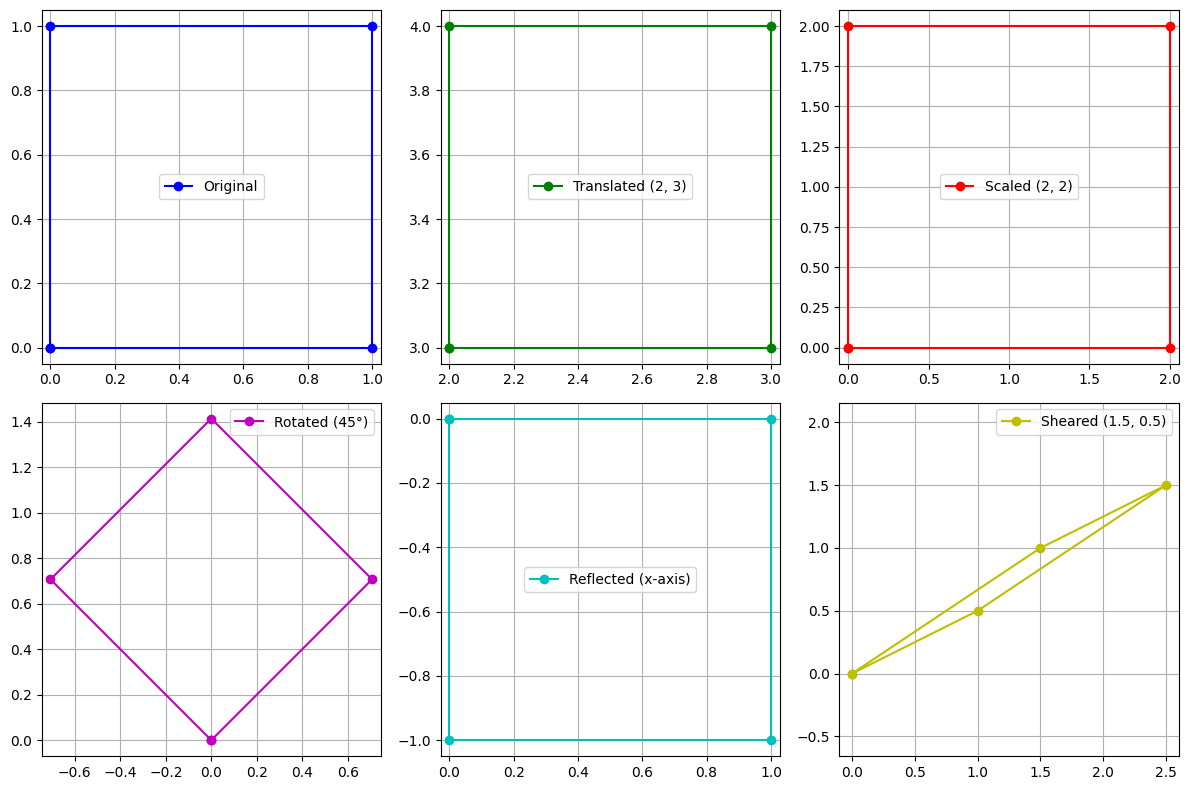

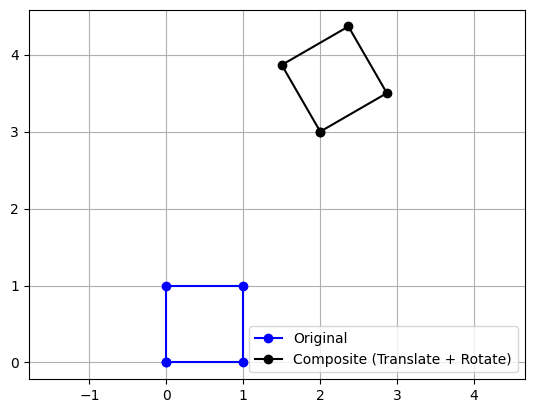

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plot_polygon(points, "Original", 'b')

plt.subplot(2, 3, 2)
plot_polygon(translated_points, "Translated (2, 3)", 'g')

plt.subplot(2, 3, 3)
plot_polygon(scaled_points, "Scaled (2, 2)", 'r')

plt.subplot(2, 3, 4)
plot_polygon(rotated_points, "Rotated (45°)", 'm')

plt.subplot(2, 3, 5)
plot_polygon(reflected_points, "Reflected (x-axis)", 'c')

plt.subplot(2, 3, 6)
plot_polygon(sheared_points, "Sheared (1.5, 0.5)", 'y')

plt.tight_layout()
plt.show()

plt.figure()
plot_polygon(points, "Original", 'b')
plot_polygon(composite_points, "Composite (Translate + Rotate)", 'k')
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(title, image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def translate_image(image, tx, ty):
    rows, cols = image.shape[:2]
    T = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, T, (cols, rows))
    return translated_image

def reflect_image(image, axis):
    if axis == 'x':
        reflected_image = cv2.flip(image, 0)
    elif axis == 'y':
        reflected_image = cv2.flip(image, 1)
    elif axis == 'both':
        reflected_image = cv2.flip(image, -1)
    else:
        raise ValueError("Invalid axis for reflection.")
    return reflected_image

def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    center = (cols / 2, rows / 2)
    R = cv2.getRotationMatrix2D(center, angle, 1)
    rotated_image = cv2.warpAffine(image, R, (cols, rows))
    return rotated_image

def scale_image(image, fx, fy):
    scaled_image = cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
    return scaled_image

def crop_image(image, x_start, y_start, width, height):
    cropped_image = image[y_start:y_start+height, x_start:x_start+width]
    return cropped_image

def shear_image(image, shx=0, shy=0):
    rows, cols = image.shape[:2]
    M = np.float32([[1, shx, 0],
                    [shy, 1,  0]])
    sheared_image = cv2.warpAffine(image, M, (cols + int(abs(shx) * rows), rows + int(abs(shy) * cols)))
    return sheared_image

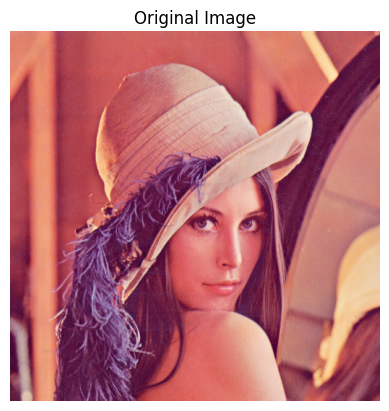

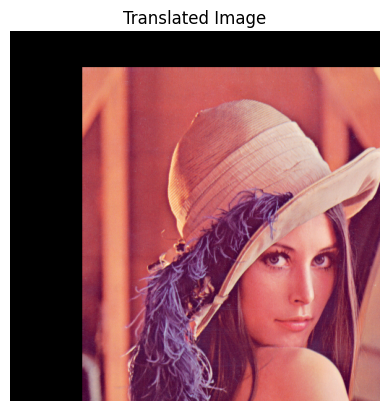

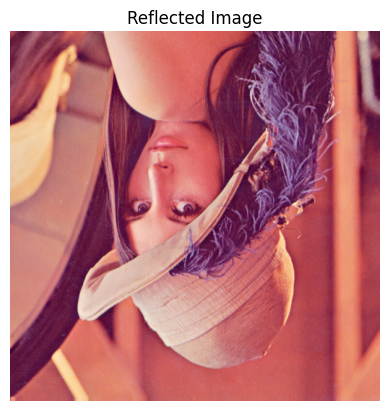

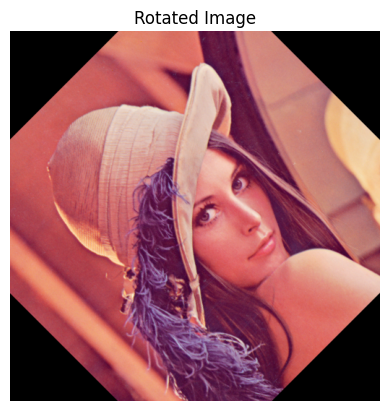

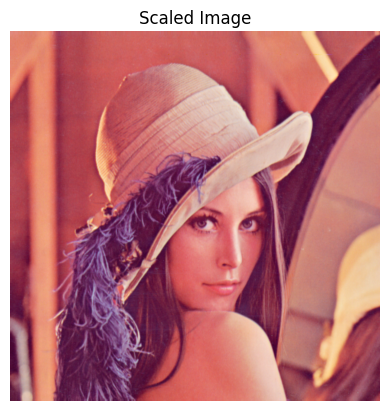

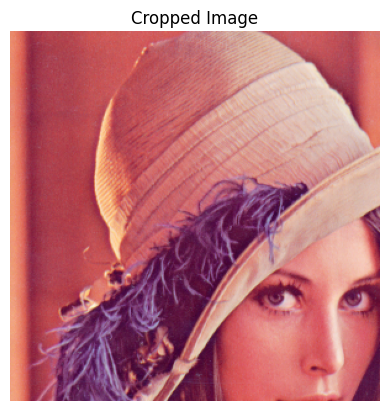

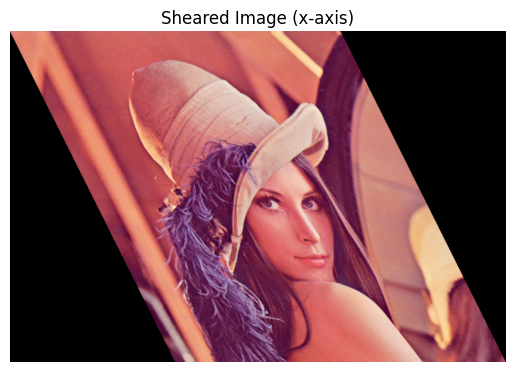

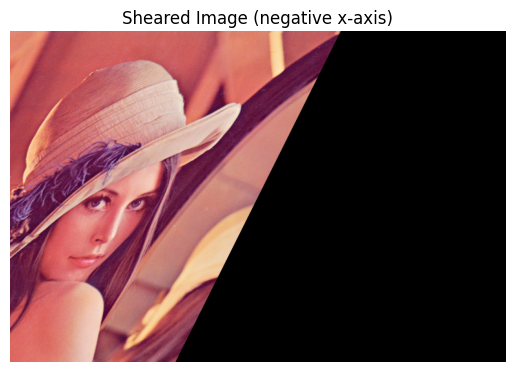

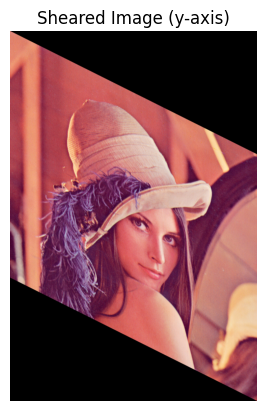

In [ ]:
image_path = 'Lena_Image.png'
image = cv2.imread(image_path)

if image is None:
    print("Error")
else:
    translated_image = translate_image(image, 100, 50)
    reflected_image = reflect_image(image, 'both')
    rotated_image = rotate_image(image, 45)
    scaled_image = scale_image(image, 1.5, 1.5)
    cropped_image = crop_image(image, 50, 50, 300, 300)
    sheared_image_x = shear_image(image, shx=0.5)
    sheared_image_x_neg = shear_image(image, shx=-0.5)
    sheared_image_y = shear_image(image, shy=0.5)

    display_image("Original Image", image)
    display_image("Translated Image", translated_image)
    display_image("Reflected Image", reflected_image)
    display_image("Rotated Image", rotated_image)
    display_image("Scaled Image", scaled_image)
    display_image("Cropped Image", cropped_image)
    display_image("Sheared Image (x-axis)", sheared_image_x)
    display_image("Sheared Image (negative x-axis)", sheared_image_x_neg)
    display_image("Sheared Image (y-axis)", sheared_image_y)
